In [ ]:
import duckdb
import time
import sys
from datetime import datetime
import requests

file_path = "../data/2022big.parquet"

result1 = duckdb.query(f"""SELECT x, y, COUNT(*) AS coordinate_count
                        FROM '{file_path}'
                        GROUP BY x, y
                        ORDER BY coordinate_count DESC
                        LIMIT 10;""")
                      
df1 = result1.to_df()
print(df1)


      x     y  coordinate_count
0     0     0             98807
1   359   564             69198
2   349   564             55230
3   859   766             52261
4   860   766             51485
5   104   768             38086
6   105   768             34082
7  1999  1999             31437
8  1999     0             30882
9   633   728             30752


In [8]:
def get_color_name(hex_color):
    url = f"https://www.thecolorapi.com/id?hex={hex_color.lstrip('#')}"
    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            return data.get("name", {}).get("value", "Unknown")
        else:
            return "Unknown"
    except Exception as e:
        return "Unknown"

In [49]:
result2 = duckdb.query(f"""SELECT pixel_color, COUNT (*) as color_count
                        FROM '{file_path}'
                        WHERE x == 0 and y == 0
                        GROUP BY pixel_color
                        ORDER BY color_count DESC
                        LIMIT 5;""")
df2 = result2.to_df()

df2['color_name'] = df2['pixel_color'].apply(get_color_name)

print(df2)

  pixel_color  color_count color_name
0     #FFFFFF        59282      White
1     #000000         8715      Black
2     #FF4500         4209  Vermilion
3     #811E9F         2200     Seance
4     #BE0039         2189      Monza


In [52]:
result3 = duckdb.query(f"""SELECT pixel_color, COUNT (*) as color_count
                        FROM '{file_path}'
                        WHERE x == 359 and y == 564
                        GROUP BY pixel_color
                        ORDER BY color_count DESC
                        LIMIT 5;""")
df3 = result3.to_df()

df3['color_name'] = df3['pixel_color'].apply(get_color_name)

print(df3)

  pixel_color  color_count   color_name
0     #000000        34726        Black
1     #51E9F4        26940        Spray
2     #FF4500         1656    Vermilion
3     #FFFFFF         1391        White
4     #3690EA          860  Picton Blue


In [13]:
result4 = duckdb.query(f"""SELECT pixel_color, COUNT (*) as color_count
                        FROM '{file_path}'
                        WHERE x == 349 and y == 564
                        GROUP BY pixel_color
                        ORDER BY color_count DESC
                        LIMIT 5;""")
df4 = result4.to_df()

df4['color_name'] = df4['pixel_color'].apply(get_color_name)

print(df4)

  pixel_color  color_count color_name
0     #000000        27804      Black
1     #51E9F4        19404      Spray
2     #FF4500         2120  Vermilion
3     #FFFFFF         1512      White
4     #BE0039          846      Monza


/var/folders/wn/1h4z_5y959g0lxlcphs4q6bc0000gn/T/ipykernel_4510/1692287342.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='color_count', y='color_name', data=df3, palette=pixel_color)


<Axes: xlabel='color_count', ylabel='color_name'>

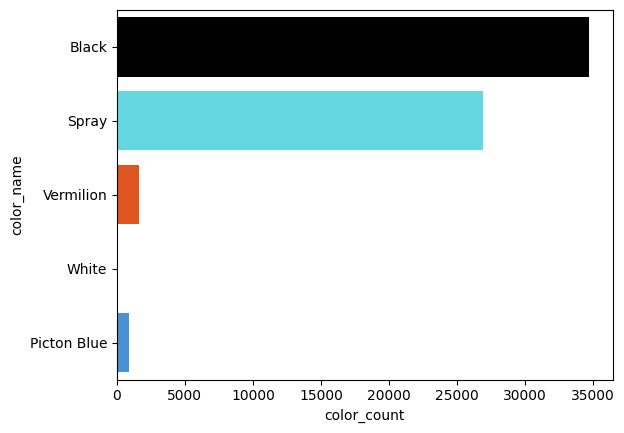

In [ ]:
import seaborn as sns
pixel_color = df3["pixel_color"].to_list()

sns.barplot(x='color_count', y='color_name', data=df3, palette=pixel_color).set(title='Color Bar Plot for (359, 564)')

/var/folders/wn/1h4z_5y959g0lxlcphs4q6bc0000gn/T/ipykernel_4510/504858444.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='color_count', y='color_name', data=df4, palette=pixel_color).set(title='Color Bar Plot for (349, 564)')


[Text(0.5, 1.0, 'Color Bar Plot for (349, 564)')]

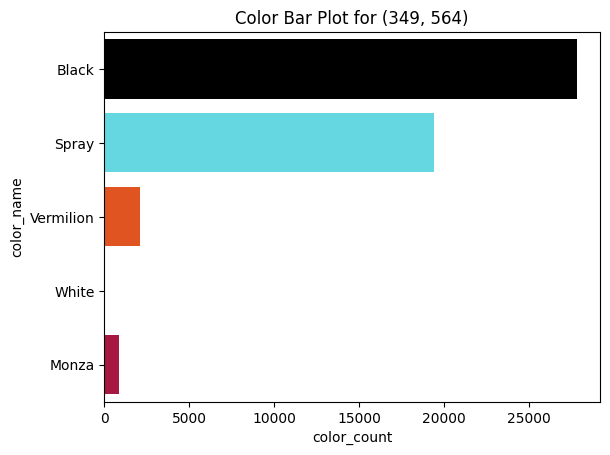

In [56]:
pixel_color = df4["pixel_color"].to_list()

sns.barplot(x='color_count', y='color_name', data=df4, palette=pixel_color).set(title='Color Bar Plot for (349, 564)')